In [2]:
import pandas as pd
import seaborn as sns
from itertools import product
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('../../EnefitBigData/merge.csv')
df.drop('Unnamed: 0', inplace=True, axis=1)

FileNotFoundError: [Errno 2] No such file or directory: '../../EnefitBigData/merge.csv'

In [ ]:
time_feat = ['datetime']
cat_feat = ['county', 'is_business', 'product_type', 'is_consumption', 'data_block_id']
num_feat = df.drop(time_feat+cat_feat, axis=1).columns
# train_feat = df.drop([time_feat[0], cat_feat[0], cat_feat[1], cat_feat[2], cat_feat[4]], axis=1).columns

In [ ]:
cols = df.columns.tolist()
cols = cols[3:] + cols[:3]
df = df[cols]

In [ ]:
df_test = df.drop('product_type', axis=1).groupby(['county', 'is_business', 'is_consumption']).mean().reset_index()
df_test.head(5)

,county,is_business,is_consumption,target,data_block_id,lowest_price_per_mwh,highest_price_per_mwh,eic_count,installed_capacity,euros_per_mwh,...,surface_pressure_h,cloudcover_total_h,cloudcover_low_h,cloudcover_mid_h,cloudcover_high_h,windspeed_10m_h,winddirection_10m_h,shortwave_radiation_h,direct_solar_radiation_h,diffuse_radiation_h
0,0,0,0,333.010249,318.500000,95.036750,107.754631,439.023585,4405.474444,157.064176,...,1007.813997,61.263164,46.951249,34.783950,36.411751,4.468163,199.044714,104.858603,63.831577,41.027027
1,0,0,1,595.603919,318.500000,95.036750,107.754631,439.023585,4405.474444,157.064176,...,1007.813997,61.263164,46.951249,34.783950,36.411751,4.468163,199.044714,104.858603,63.831577,41.027027
2,0,1,0,197.892593,322.116178,95.587749,108.421993,116.120525,4587.315354,157.458544,...,1007.776910,61.217025,46.857063,34.901843,36.497250,4.466482,199.060405,104.891054,63.992582,40.898472
3,0,1,1,2408.799789,322.116178,95.587749,108.421993,116.120525,4587.315354,157.458544,...,1007.776910,61.217025,46.857063,34.901843,36.497250,4.466482,199.060405,104.891054,63.992582,40.898472
4,1,0,0,30.768659,318.500000,95.036750,107.754631,35.092767,344.444748,157.064176,...,1012.811699,57.851718,43.061146,31.899705,36.016236,5.020358,196.985466,108.252242,67.133617,41.118625


is_business 0, is_consumption 0


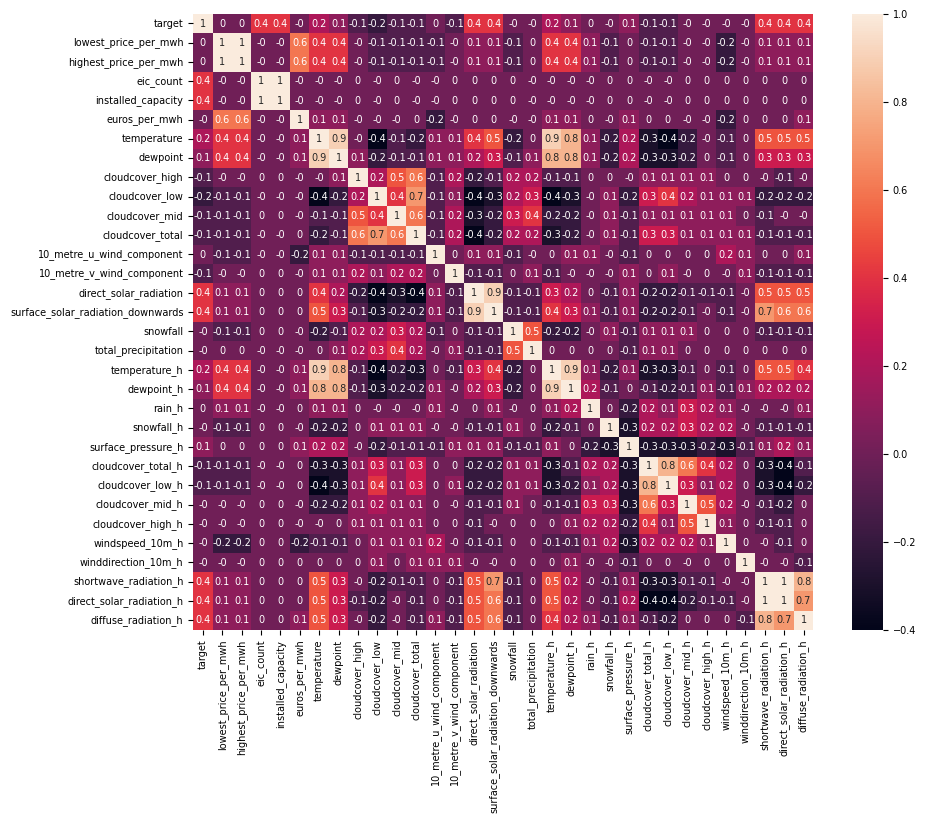

is_business 0, is_consumption 1


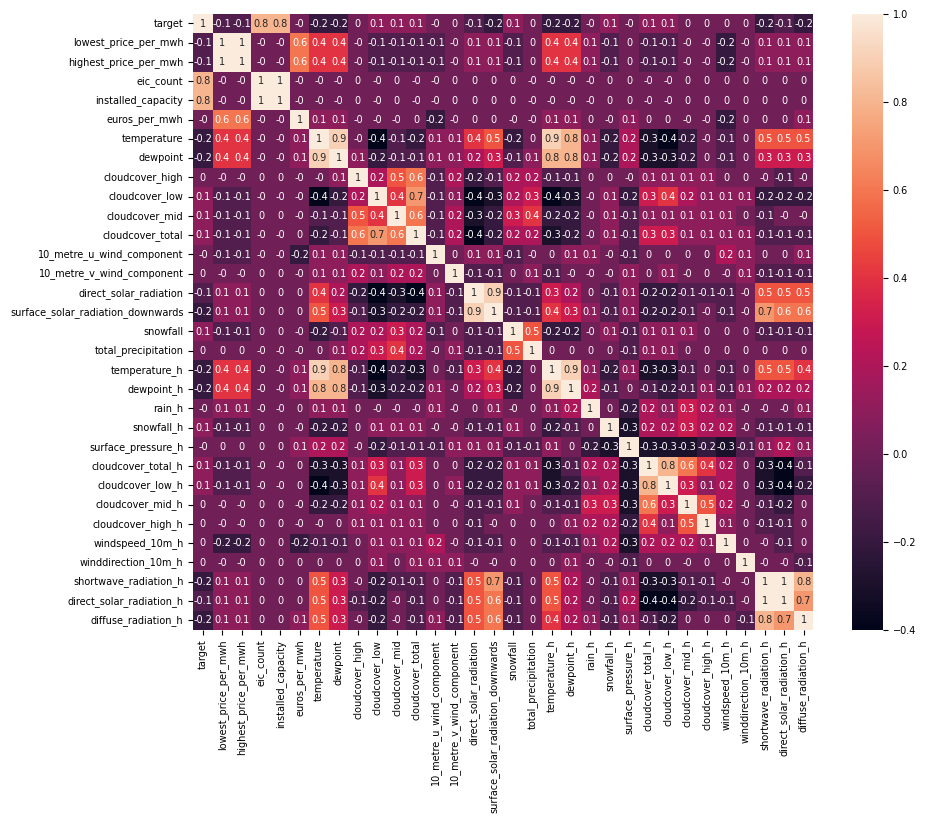

is_business 1, is_consumption 0


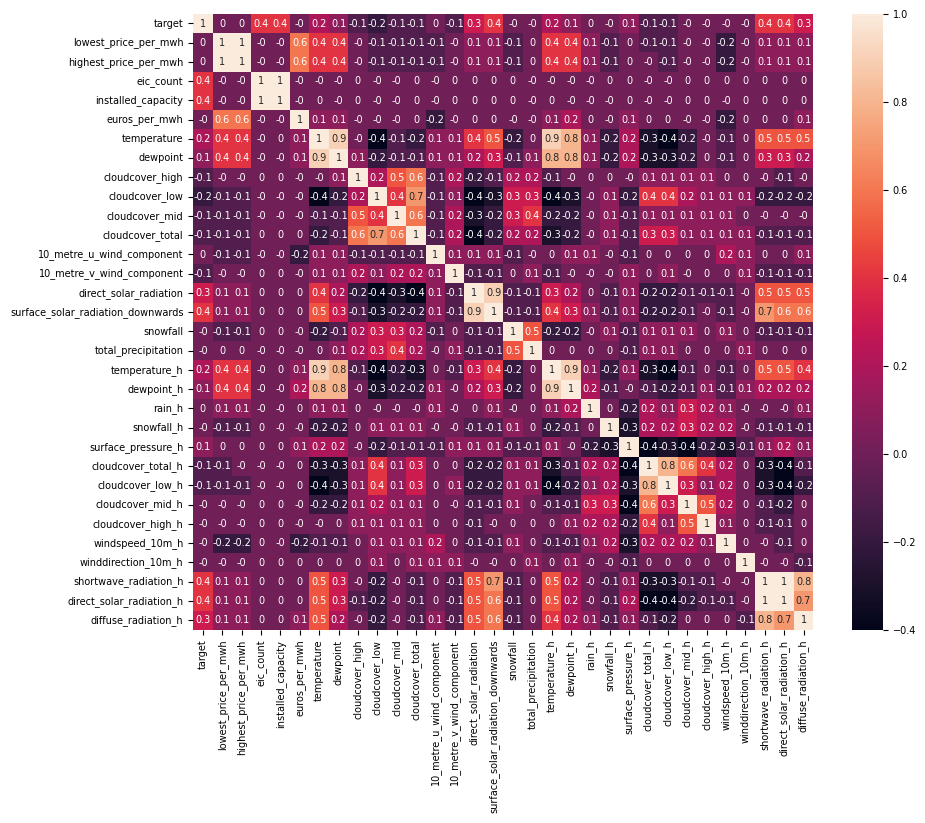

is_business 1, is_consumption 1


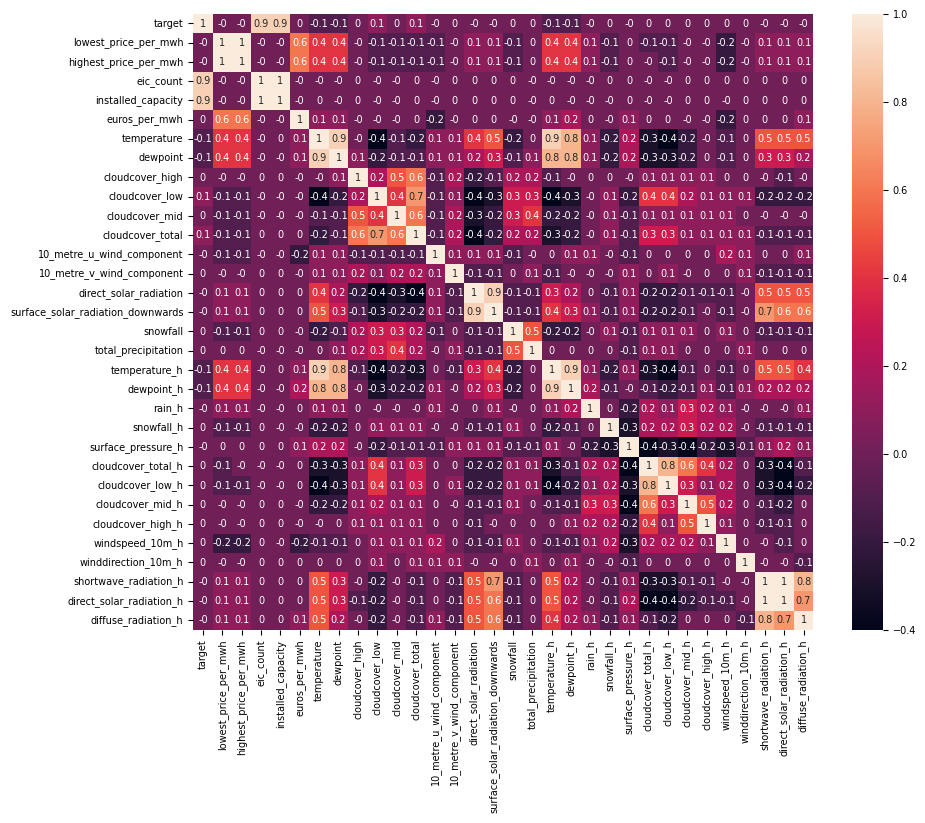

In [ ]:
ibs = df['is_business'].unique()
ics = df['is_consumption'].unique()
combi = sorted(list(product(ibs, ics, repeat=1))) # the number of all cases

plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 7
for (ib, ic) in combi:
    mini = df[(df['is_business']==ib)&(df['is_consumption']==ic)]
    if len(mini) == 0:
        print(f"is_business {ib}, is_consumption {ic}: No data")
        continue
    print(f"is_business {ib}, is_consumption {ic}")
    sns.heatmap(mini[num_feat].corr().round(1), annot=True)
    plt.show()

county 0, is_business 0, is_consumption 0


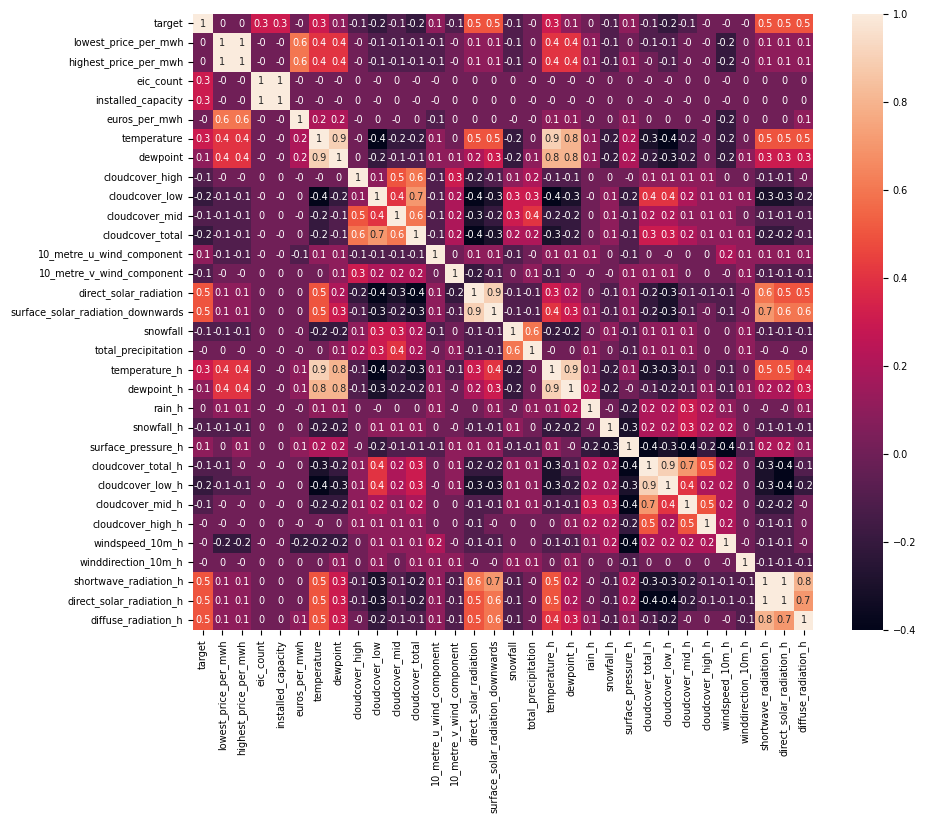

county 0, is_business 0, is_consumption 1


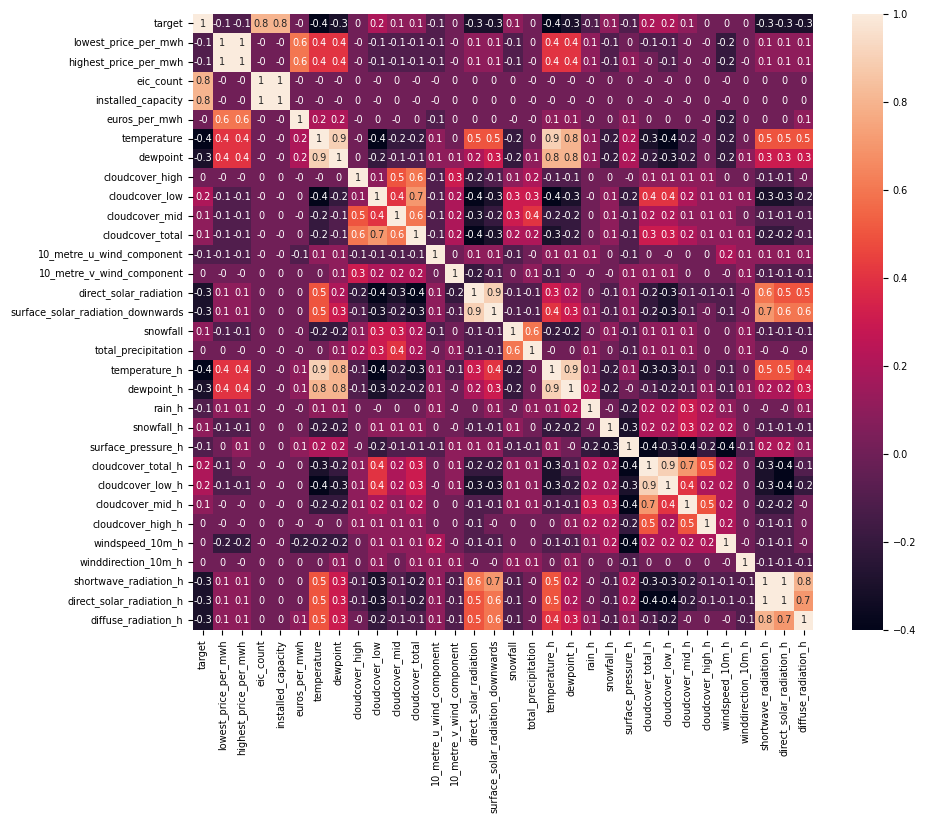

In [ ]:
cts = df['county'].unique()
ibs = df['is_business'].unique()
ics = df['is_consumption'].unique()
combi = sorted(list(product(cts, ibs, ics, repeat=1))) # the number of all cases

plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 7
for (ct, ib, ic) in combi[:2]:
    mini = df[(df['county']==ct)&(df['is_business']==ib)&(df['is_consumption']==ic)]
    if len(mini) == 0:
        print(f"county {ct}, is_business {ib}, is_consumption {ic}: No data")
        continue
    print(f"county {ct}, is_business {ib}, is_consumption {ic}")
    sns.heatmap(mini[num_feat].corr().round(1), annot=True)
    plt.show()

county 0, product_type 0, is_business 0, is_consumption 0: No data
county 0, product_type 0, is_business 0, is_consumption 1: No data
county 0, product_type 0, is_business 1, is_consumption 0


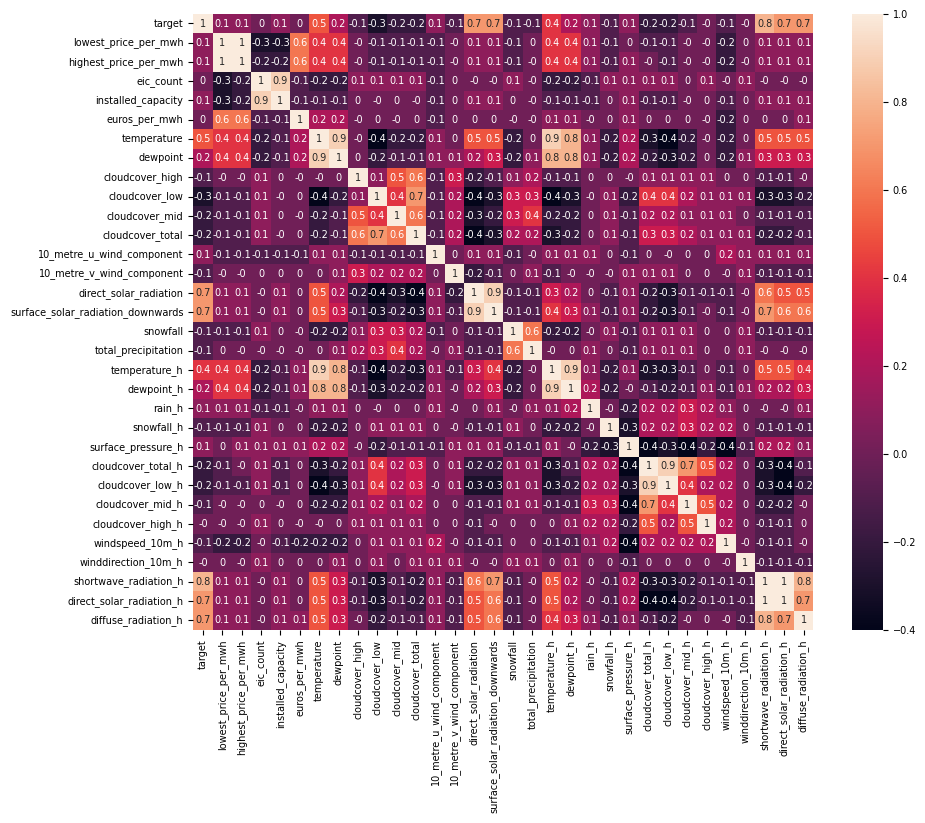

county 0, product_type 0, is_business 1, is_consumption 1


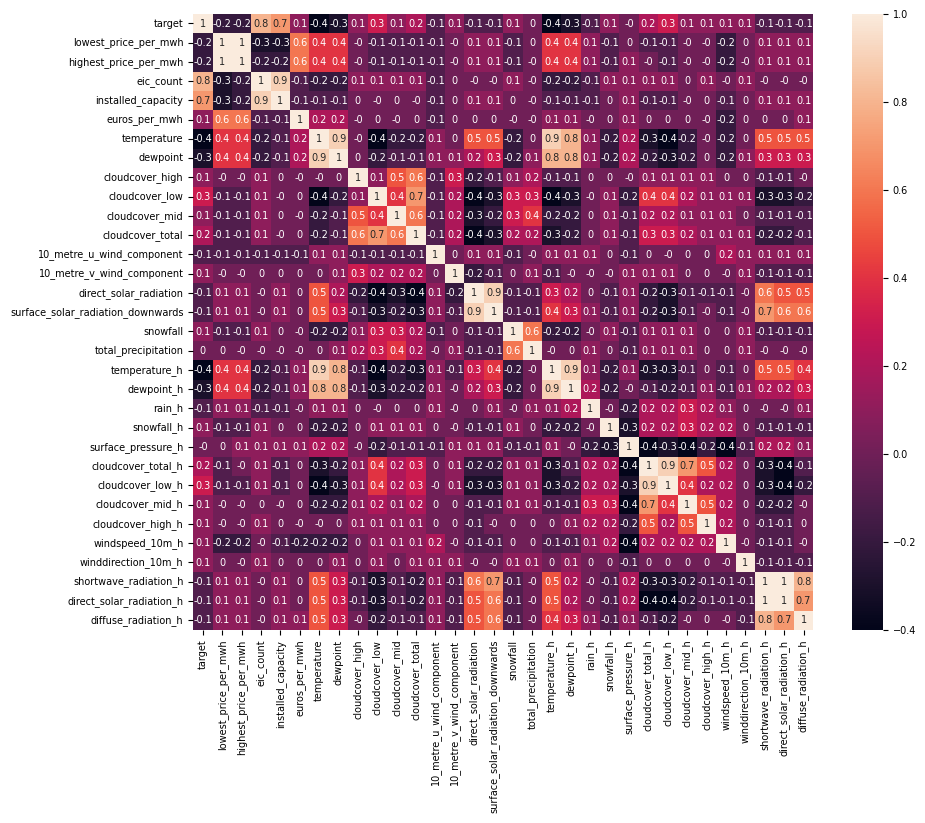

In [ ]:
cts = df['county'].unique()
pts = df['product_type'].unique()
ibs = df['is_business'].unique()
ics = df['is_consumption'].unique()
combi = sorted(list(product(cts, pts, ibs, ics, repeat=1))) # the number of all cases

plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 7
for (ct, pt, ib, ic) in combi[0:4]:
    mini = df[(df['county']==ct)&(df['product_type']==pt)&(df['is_business']==ib)&(df['is_consumption']==ic)]
    if len(mini) == 0:
        print(f"county {ct}, product_type {pt}, is_business {ib}, is_consumption {ic}: No data")
        continue
    print(f"county {ct}, product_type {pt}, is_business {ib}, is_consumption {ic}")
    sns.heatmap(mini[num_feat].corr().round(1), annot=True)
    plt.show()

<AxesSubplot: >

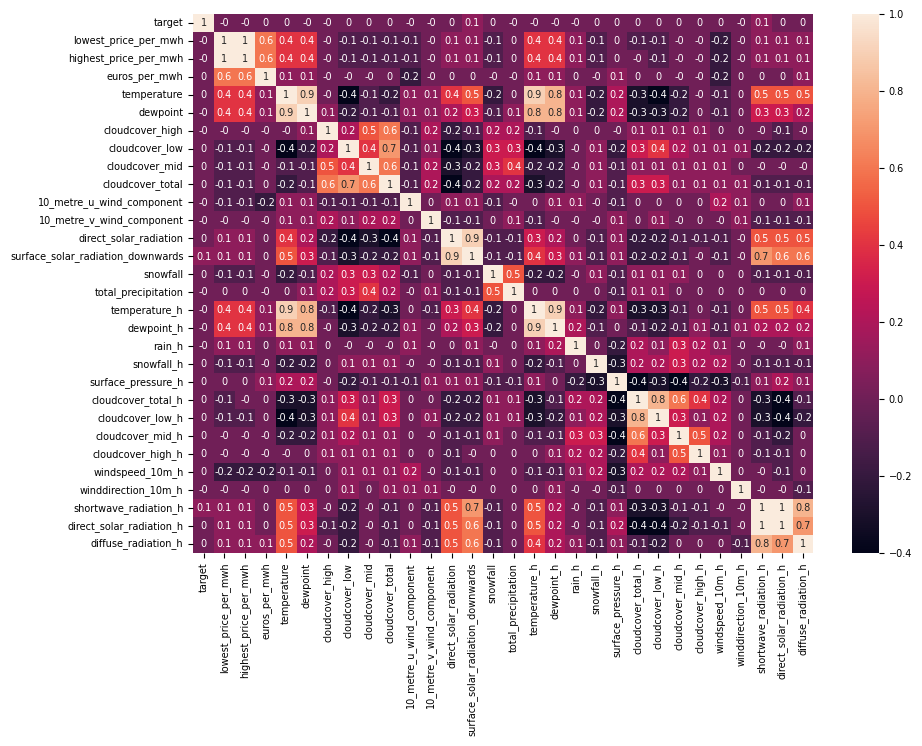

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df[num_feat.drop(['installed_capacity', 'eic_count'])].corr().round(1), annot=True)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df[num_feat.drop(['installed_capacity', 'eic_count'])].corr('kendall').round(1), annot=True)

is_consumption 0


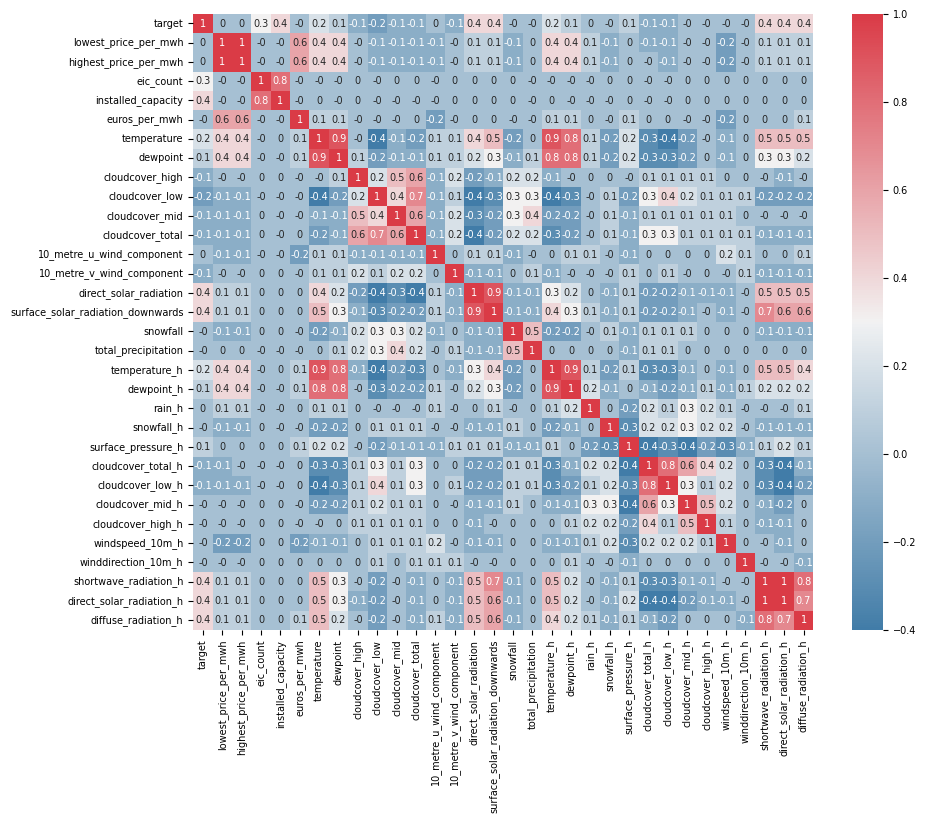

is_consumption 1


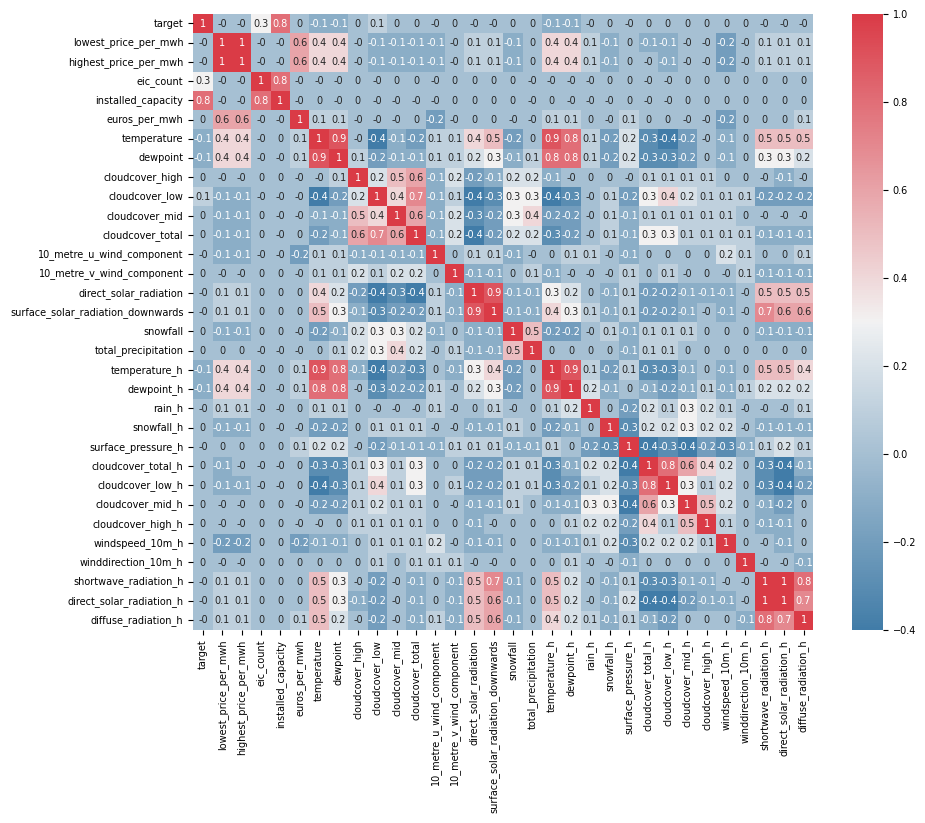

In [ ]:
cmap = sns.diverging_palette(240, 10, as_cmap=True)
ics = df['is_consumption'].unique()

plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 7
for ic in ics:
    mini = df[(df['is_consumption']==ic)]
    print(f"is_consumption {ic}")
    sns.heatmap(mini[num_feat].corr().round(1), cmap=cmap, annot=True)
    plt.show()